In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun_results = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 6).all()

In [5]:
#  3. Convert the June temperatures to a list.
jun_temp=np.ravel(jun_results)

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_jun_temp=pd.DataFrame(jun_temp)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_stats=df_jun_temp.describe()
jun_stats.rename(columns = {0:"June Temps"})

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of Decem
dec_results = session.query(Measurement.tobs).filter(extract("month", Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temp = np.ravel(dec_results)

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp)

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_stats=dec_temp_df.describe()
dec_stats.rename(columns = {0:"December Temps"})

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Queries

In [12]:
#June Precipitation
jun_prcp_results = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 6).all()
jun_prcp_df=pd.DataFrame(np.ravel(jun_prcp_results))
jun_prcp_df.describe()

,0
count,1574.0
unique,124.0
top,0.0
freq,647.0


In [13]:
#Dec Precipitation
dec_prcp_results = session.query(Measurement.prcp).filter(extract("month", Measurement.date) == 12).all()
dec_prcp_df=pd.DataFrame(np.ravel(dec_prcp_results))
dec_prcp_df.describe()

,0
count,1405.0
unique,153.0
top,0.0
freq,510.0


In [14]:
# Jun Avg, Max and Min Prcp
session.query(func.avg(Measurement.prcp),func.max(Measurement.prcp),func.min(Measurement.prcp)).filter(extract("month", Measurement.date) == 6).all()

[(0.13635959339263018, 4.43, 0.0)]

In [15]:
# Dec Avg, Max and Min Prcp
session.query(func.avg(Measurement.prcp),func.max(Measurement.prcp),func.min(Measurement.prcp)).filter(extract("month", Measurement.date) == 12).all()

[(0.21681850533807792, 6.42, 0.0)]

<AxesSubplot:ylabel='Frequency'>

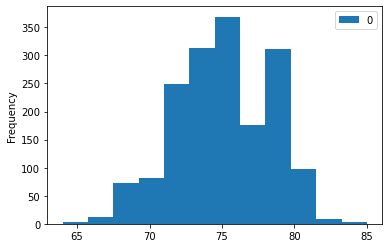

In [16]:
#Jun Data Plot
df_jun_temp.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

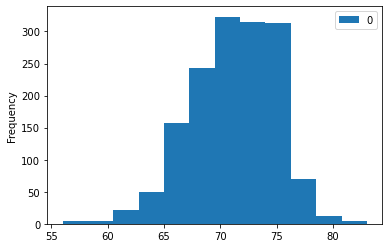

In [19]:
#Dec Data Plot
dec_temp_df.plot.hist(bins=12)